In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Walmart_Store_sales.csv")

In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Which store has maximum sales: 

In [6]:
store = df.groupby("Store")
store.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6292,45,05-02-2010,890689.51,0,27.31,2.784,181.871190,8.992
6293,45,12-02-2010,656988.64,1,27.73,2.773,181.982317,8.992
6294,45,19-02-2010,841264.04,0,31.27,2.745,182.034782,8.992
6295,45,26-02-2010,741891.65,0,34.89,2.754,182.077469,8.992


In [7]:
totalprice=0
storenumber=0
for i in range(1,46):
    ss = store.get_group(i)
    fin = ss["Weekly_Sales"].sum()
    if totalprice<fin:
        totalprice=fin
        storenumber=i
    else:
        continue
        
print(storenumber)
print(totalprice)

20
301397792.46000004


# Which store has maximum standard deviation:

In [8]:
stand_div = 0
shop_num = 0
for i in range (1,46):
    ss = store.get_group(i)
    fin = ss["Weekly_Sales"].std()
    if stand_div<fin:
        stand_div=fin
        shop_num=i
    else:
        continue
print(stand_div)
print(shop_num)

317569.9494755083
14


# Find out the coefficient of mean to standard deviation

In [9]:
mn = store.get_group(14)["Weekly_Sales"].mean()
coefficient = (stand_div/mn)*100
coefficient

15.713673600948338

# Which store/s has good quarterly growth rate in Q3’2012

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [12]:
df["Quarter"] = df.Date.dt.quarter

In [13]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Quarter                  int64
dtype: object

In [14]:
df['quarter'] = df['Date'].dt.to_period('Q')

In [15]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3,2012Q3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2,2012Q2
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,4,2012Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,2012Q4
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,4,2012Q4


In [16]:
df = df.astype(str)

In [17]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.0135577,8.684,3,2012Q3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.1704115,8.667,2,2012Q2
6432,45,2012-12-10,734464.36,0,54.47,4.0,192.3272654,8.667,4,2012Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.3308542,8.667,4,2012Q4
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.3088989,8.667,4,2012Q4


In [18]:
qt = df.groupby("quarter") 
q3 = qt.get_group("2012Q3")

In [19]:
q3

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.0591887,7.348,3,2012Q3
122,1,2012-08-06,1697230.96,0,78.3,3.452,221.7494839,7.143,3,2012Q3
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.9241579,6.908,3,2012Q3
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.9327267,6.908,3,2012Q3
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.9412954,6.908,3,2012Q3
...,...,...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,3,2012Q3
6427,45,2012-07-09,766512.66,1,75.7,3.911,191.5776756,8.684,3,2012Q3
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.69985,8.684,3,2012Q3
6429,45,2012-09-21,723086.2,0,65.32,4.038,191.8567038,8.684,3,2012Q3


In [20]:
qtstore = q3.groupby("Store")

In [21]:
final_stocks=0
store_numbers=0
for i in range(1,46):
    ss = store.get_group(i)
    fin = ss["Weekly_Sales"].mean()
    if final_stocks<fin:
        final_stocks=fin
        store_numbers=i
    else:
        continue
print(final_stocks)
print(store_numbers)

2107676.8703496507
20


# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [22]:
hold = df.groupby("Holiday_Flag")

In [23]:
non_hold = hold.get_group("0")

In [24]:
non_hold.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.0963582,8.106,2,2010Q2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,1,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,1,2010Q1
4,1,2010-05-03,1554806.68,0,46.5,2.625,211.3501429,8.106,2,2010Q2
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.3806429,8.106,4,2010Q4


In [25]:
mean_sale_non =non_hold["Weekly_Sales"].astype(float).mean()
mean_sale_non

1041256.3802088564

In [26]:
yes_hold = hold.get_group("1")

In [27]:
yes_hold.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.6737376,8.625,3,2011Q3
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.3504,8.523,4,2011Q4
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.0620155,8.523,4,2011Q4
6397,45,2012-10-02,803657.12,1,37.0,3.64,189.7076048,8.424,4,2012Q4
6427,45,2012-07-09,766512.66,1,75.7,3.911,191.5776756,8.684,3,2012Q3


In [28]:
yes_hold["Holiday_blast"] = yes_hold['Weekly_Sales'].astype(float).apply(lambda x: 'True' if x <= mean_sale_non else 'False')    

<ipython-input-28-6d6f2fac75f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_hold["Holiday_blast"] = yes_hold['Weekly_Sales'].astype(float).apply(lambda x: 'True' if x <= mean_sale_non else 'False')


In [29]:
yes_hold.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter,Holiday_blast
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.2421698,8.106,4,2010Q4,False
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.4951902,7.787,4,2010Q4,False
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.7484333,7.838,4,2010Q4,False
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.4049321,7.838,4,2010Q4,False
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.9367046,7.742,4,2011Q4,False


In [30]:
high_hold_s = yes_hold.groupby("Holiday_blast").get_group("True")

In [31]:
high_hold_s.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter,Holiday_blast
287,3,2010-12-02,420728.96,1,47.93,2.548,214.5747916,7.368,4,2010Q4,True
317,3,2010-10-09,352260.97,1,80.84,2.565,214.8065431,7.346,4,2010Q4,True
328,3,2010-11-26,565567.84,1,68.71,2.735,215.0614025,7.564,4,2010Q4,True
333,3,2010-12-31,382677.76,1,53.2,2.943,214.6986466,7.564,4,2010Q4,True
339,3,2011-11-02,430526.21,1,43.57,3.022,216.2660913,7.551,4,2011Q4,True


In [32]:
Super_Bowl=['12-Feb-10','11-Feb-11','10-Feb-12','8-Feb-13']
Labour_Day=['10-Sep-10','9-Sep-11','7-Sep-12','6-Sep-13']
Thanksgiving=['26-Nov-10','25-Nov-11','23-Nov-12','29-Nov-13']
Christmas=['31-Dec-10','30-Dec-11','28-Dec-12','27-Dec-13']
dic = {'Super_Bowl':Super_Bowl,'Labour_Day':Labour_Day,'Thanksgiving':Thanksgiving,'Christmas':Christmas}
Holiday = pd.DataFrame(dic)
Holiday.head()

,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,12-Feb-10,10-Sep-10,26-Nov-10,31-Dec-10
1,11-Feb-11,9-Sep-11,25-Nov-11,30-Dec-11
2,10-Feb-12,7-Sep-12,23-Nov-12,28-Dec-12
3,8-Feb-13,6-Sep-13,29-Nov-13,27-Dec-13


In [33]:
high_hold_s["Date"] = pd.to_datetime(high_hold_s["Date"])

<ipython-input-33-c95a9a118390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_hold_s["Date"] = pd.to_datetime(high_hold_s["Date"])


In [34]:
high_hold_s["Date"].dtype

dtype('<M8[ns]')

In [35]:
high_hold_s["Date"].head()

287   2010-12-02
317   2010-10-09
328   2010-11-26
333   2010-12-31
339   2011-11-02
Name: Date, dtype: datetime64[ns]

In [36]:
Holiday['Super_Bowl']=pd.to_datetime(Holiday['Super_Bowl'])
Holiday['Labour_Day']=pd.to_datetime(Holiday['Labour_Day'])
Holiday['Thanksgiving']=pd.to_datetime(Holiday['Thanksgiving'])
Holiday['Christmas']=pd.to_datetime(Holiday['Christmas'])

In [37]:
Holiday.head()

,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,2010-02-12,2010-09-10,2010-11-26,2010-12-31
1,2011-02-11,2011-09-09,2011-11-25,2011-12-30
2,2012-02-10,2012-09-07,2012-11-23,2012-12-28
3,2013-02-08,2013-09-06,2013-11-29,2013-12-27


In [38]:
HDAY=[]
def check_date(date):
    if date in list(Holiday['Super_Bowl'].astype(str)):
        return HDAY.append("Super_Bowl")
    elif date in list(Holiday['Labour_Day'].astype(str)):
        return HDAY.append("Labour_Day")
    elif date in list(Holiday['Thanksgiving'].astype(str)):
        return HDAY.append("Thanksgiving")
    elif date in list(Holiday['Christmas'].astype(str)):
        return HDAY.append("Christmas")
    else:
        return HDAY.append("Not applicable")
high_hold_s["Date"].astype(str).apply(check_date)
high_hold_s['HDAY'] = HDAY
high_hold_s.head()

<ipython-input-38-5476ee4fe77e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_hold_s['HDAY'] = HDAY


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter,Holiday_blast,HDAY
287,3,2010-12-02,420728.96,1,47.93,2.548,214.5747916,7.368,4,2010Q4,True,Not applicable
317,3,2010-10-09,352260.97,1,80.84,2.565,214.8065431,7.346,4,2010Q4,True,Not applicable
328,3,2010-11-26,565567.84,1,68.71,2.735,215.0614025,7.564,4,2010Q4,True,Thanksgiving
333,3,2010-12-31,382677.76,1,53.2,2.943,214.6986466,7.564,4,2010Q4,True,Christmas
339,3,2011-11-02,430526.21,1,43.57,3.022,216.2660913,7.551,4,2011Q4,True,Not applicable


In [39]:
high_hold_s["HDAY"].value_counts()

Not applicable    121
Christmas          55
Thanksgiving       29
Labour_Day         25
Name: HDAY, dtype: int64

# Provide a monthly and semester view of sales in units and give insights

In [40]:
df["months"]= pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter,months,year
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.0963582,8.106,2,2010Q2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.2421698,8.106,4,2010Q4,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,1,2010Q1,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,1,2010Q1,2,2010
4,1,2010-05-03,1554806.68,0,46.5,2.625,211.3501429,8.106,2,2010Q2,5,2010


In [41]:
yr_2010 = df.groupby("year").get_group(2010)

In [42]:
yr_2010.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter,months,year
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.0963582,8.106,2,2010Q2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.2421698,8.106,4,2010Q4,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,1,2010Q1,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,1,2010Q1,2,2010
4,1,2010-05-03,1554806.68,0,46.5,2.625,211.3501429,8.106,2,2010Q2,5,2010


In [43]:
mn_2010 = yr_2010.groupby("months")

In [44]:
mn_2010["months"].value_counts()

months  months
1       1          45
2       2         180
3       3         180
4       4         180
5       5         270
6       6         135
7       7         180
8       8         180
9       9         180
10      10        225
11      11        135
12      12        270
Name: months, dtype: int64

In [45]:
total_sale = []
for i in range(1,13):
    ss = mn_2010.get_group(i)
    total_sale.append(ss['Weekly_Sales'].astype(float).mean())
months = [1,2,3,4,5,6,7,8,9,10,11,12]
sale_hist = pd.DataFrame(list(zip(total_sale, months)),
               columns =['total_sale', 'months'])
sale_hist.head()

,total_sale,months
0,9.386639e+05,1
1,1.064372e+06,2
2,1.034590e+06,3
3,1.021177e+06,4
4,1.039303e+06,5


<AxesSubplot:xlabel='months'>

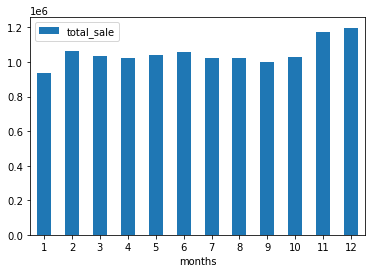

In [46]:
sale_hist.plot.bar(x='months',rot=0)

# Semester view of sales in units and give insights

In [47]:
yr_2010.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter,months,year
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.0963582,8.106,2,2010Q2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.2421698,8.106,4,2010Q4,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,1,2010Q1,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,1,2010Q1,2,2010
4,1,2010-05-03,1554806.68,0,46.5,2.625,211.3501429,8.106,2,2010Q2,5,2010


In [48]:
yr_2010["sem_yr"]=yr_2010["Quarter"].astype(int).apply(lambda x: "Sem yr 1st" if x<=2 else "Sem yr 2nd")

<ipython-input-48-3e638e4f1415>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_2010["sem_yr"]=yr_2010["Quarter"].astype(int).apply(lambda x: "Sem yr 1st" if x<=2 else "Sem yr 2nd")


In [49]:
yr_2010.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter,months,year,sem_yr
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.0963582,8.106,2,2010Q2,5,2010,Sem yr 1st
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.2421698,8.106,4,2010Q4,12,2010,Sem yr 2nd
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,1,2010Q1,2,2010,Sem yr 1st
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,1,2010Q1,2,2010,Sem yr 1st
4,1,2010-05-03,1554806.68,0,46.5,2.625,211.3501429,8.106,2,2010Q2,5,2010,Sem yr 1st


In [50]:
sem_yr_1 = yr_2010.groupby("sem_yr").get_group("Sem yr 1st")
sem_yr_1["Weekly_Sales"].astype(float).mean()

1037285.5882222232

In [51]:
sem_yr_2 = yr_2010.groupby("sem_yr").get_group("Sem yr 2nd")
sem_yr_2["Weekly_Sales"].astype(float).mean()

1078609.7333931637

<AxesSubplot:xlabel='sem_yr_2010'>

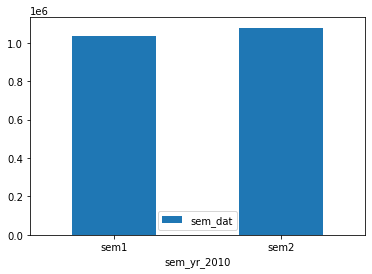

In [52]:
sem_bar = pd.DataFrame({'sem_yr_2010': ['sem1','sem2'], 'sem_dat':[1037285.5882222232,1078609.7333931637]})
sem_bar.plot.bar(x='sem_yr_2010', y='sem_dat', rot=0)

# Utilize variables like date and restructure dates as 1 for 5 Feb 2010 

In [53]:
df.dtypes

Store           object
Date            object
Weekly_Sales    object
Holiday_Flag    object
Temperature     object
Fuel_Price      object
CPI             object
Unemployment    object
Quarter         object
quarter         object
months           int64
year             int64
dtype: object

In [54]:
date_list = []
for i in range(len(df["Date"])):
    date_list.append(i+1)
df["Date_count"]=date_list
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter,months,year,Date_count
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.0963582,8.106,2,2010Q2,5,2010,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.2421698,8.106,4,2010Q4,12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,1,2010Q1,2,2010,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,1,2010Q1,2,2010,4
4,1,2010-05-03,1554806.68,0,46.5,2.625,211.3501429,8.106,2,2010Q2,5,2010,5


# Change dates into days by creating new variable.

In [55]:
df["DAY"]=pd.to_datetime(df["Date"]).apply(lambda x:x.day_name())

In [56]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,quarter,months,year,Date_count,DAY
0,1,2010-05-02,1643690.9,0,42.31,2.572,211.0963582,8.106,2,2010Q2,5,2010,1,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.2421698,8.106,4,2010Q4,12,2010,2,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.2891429,8.106,1,2010Q1,2,2010,3,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.3196429,8.106,1,2010Q1,2,2010,4,Friday
4,1,2010-05-03,1554806.68,0,46.5,2.625,211.3501429,8.106,2,2010Q2,5,2010,5,Monday
